<a href="https://colab.research.google.com/github/Karthik-S-EC/Image-Quality-Assesment-Python-OpenCV/blob/master/coins_train_16_jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [0]:
CATEGORIES = ["rupee1", "rupee2","rupee5","rupee10"]

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/Coin_Image_datasets/

/content/gdrive/My Drive/Coin_Image_datasets


In [0]:
DATADIR = "/content/gdrive/My Drive/Coin_Image_datasets/"

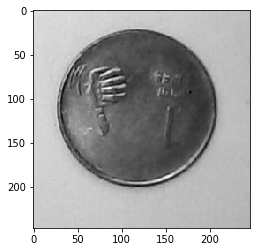

In [0]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break

(247, 246)


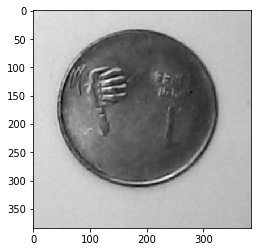

In [0]:
print(img_array.shape)
IMG_SIZE = 384

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 290/290 [01:07<00:00,  5.16it/s]

1899


In [0]:
import random
random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
    print(sample[1])

2
0
1
1
1
0
0
0
0
1


In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [0]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.applications import MobileNet
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=8, epochs=25, validation_split=0.3)
model.summary()

'''
model = Sequential()
model.add(SeparableConv2D(32, kernel_size=(3,3),activation='relu',input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(256, (3, 3)))
#model.add(Activation('relu'))
model.add(SeparableConv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(SeparableConv2D(256, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=8, epochs=25, validation_split=0.3)
model.summary()
'''

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 1329 samples, validate on 570 samples
Epoch 1/25
1329/1329 [==============================] - 22s 16ms/sample - loss: 1.4095 - acc: 0.3597 - val_loss: 1.3587 - val_acc: 0.3474
Epoch 2/25
1329/1329 [==============================] - 14s 10ms/sample - loss: 1.3367 - acc: 0.3619 - val_loss: 1.3331 - val_acc: 0.3596
Epoch 3/25
1329/1329 [==============================] - 14s 10ms/sample - loss: 1.1707 - acc: 0.4439 - val_loss: 1.0616 - val_acc: 0.5544
Epoch 4/25
1329/1329 [==============================] - 14s 10ms/sample - loss: 0.9433 - acc: 0.5899 - val_loss: 0.8320 - val_acc: 0.6684
Epoch 5/25
1329/1329 [==============================] - 14s 10ms/sample - loss: 0.6751 - acc: 0.7231 - val_loss: 0.8145 - val_acc: 0.6386
Epoch 6/25
1329/1329 [==============================] - 14s 10ms/sample - loss: 0.4670 - acc: 0.8089 - val_loss: 0.7981 - val_acc: 0.7140
Epoch 7/25
1329/1329 [======================

"\nmodel = Sequential()\nmodel.add(SeparableConv2D(32, kernel_size=(3,3),activation='relu',input_shape=X.shape[1:]))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n#model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))\n#model.add(Activation('relu'))\n#model.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(SeparableConv2D(64, kernel_size=(3,3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n#model.add(Conv2D(256, (3, 3)))\n#model.add(Activation('relu'))\nmodel.add(SeparableConv2D(128, kernel_size=(3,3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(SeparableConv2D(256, kernel_size=(3,3),activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Flatten())\nmodel.add(Dense(1000, activation='relu'))\nmodel.add(Dense(4, activation='softmax'))\nmodel.compile(loss='sparse_categorical_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\n\nmodel.fit(X, y, batch_size=8, epochs=25, validation_split=0.3)\nmod

In [0]:
import numpy as np

acc = list()
for sample in training_data:
    acc.append(sample[1])

acc_pred = list()
for img in X:
  t_set = img
  t_set = t_set.reshape(1,384,384,1)
  a = model.predict(t_set)
  a = list(a[0])
  acc_pred.append(a.index(max(a)))

print(len(acc_pred))

1899


In [0]:
for i in range(len(training_data)):
  print(acc[i],acc_pred[i])

2 2
0 0
1 1
1 1
1 1
0 0
0 0
0 0
0 0
1 1
2 2
2 2
0 0
3 3
2 2
2 2
1 1
1 1
0 0
3 3
0 0
1 1
0 0
1 1
0 0
1 1
2 2
0 0
1 1
2 2
1 1
1 1
0 0
1 1
1 1
0 0
3 3
0 0
0 0
0 0
3 3
2 2
1 1
1 1
0 0
1 1
1 1
1 1
1 1
3 3
2 2
1 1
0 0
1 1
2 2
2 2
1 1
3 3
3 3
1 1
1 1
1 1
1 1
2 2
0 0
3 3
1 1
2 2
0 0
1 1
2 2
2 2
1 1
0 0
1 1
1 1
1 1
3 3
2 2
0 0
3 3
1 1
3 3
3 3
0 0
1 1
0 0
2 2
2 2
0 0
0 0
0 0
1 1
0 0
2 2
1 1
2 2
1 1
2 2
2 2
1 1
3 3
3 3
3 3
2 2
0 0
0 0
0 0
1 1
1 1
3 3
0 0
2 2
1 1
1 1
1 1
2 2
3 3
0 0
1 1
1 1
3 3
0 0
1 1
0 0
3 3
2 2
1 1
1 1
2 2
3 3
0 0
1 1
0 0
1 1
0 0
3 3
1 1
0 0
1 1
0 0
3 3
0 0
0 0
2 2
1 1
0 0
1 1
1 1
0 0
1 1
1 1
2 2
2 2
3 3
2 2
2 2
0 0
0 0
1 1
3 3
3 3
1 1
3 3
3 3
1 1
1 1
2 2
2 2
2 2
1 1
0 0
0 0
1 1
0 0
2 2
1 1
1 1
2 2
2 2
0 0
2 2
2 2
1 1
0 0
3 3
1 1
2 2
2 2
3 3
2 2
1 1
2 2
2 2
0 0
2 2
0 0
0 0
1 1
3 3
0 0
2 2
1 1
2 2
1 1
3 3
3 3
0 0
3 3
2 2
2 2
3 3
1 1
0 0
3 3
0 0
1 1
1 1
1 1
1 1
1 1
1 1
2 2
0 0
0 0
1 1
1 1
1 1
2 2
1 1
1 1
1 1
1 1
2 2
1 1
0 0
1 1
1 1
1 1
3 3
0 0
1 1
3 3
3 3
0 0
1 1
1 1
1 1
2 2
3 3


In [0]:
%cd /content/gdrive/My Drive/Coin_Image_datasets/

/content/gdrive/My Drive/Coin_Image_datasets


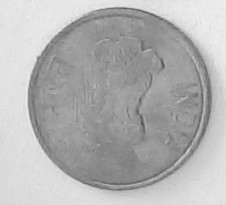

[[1.8068991e-18 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [0]:
from google.colab.patches import cv2_imshow
img = cv2.imread("sample.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
resized = cv2.resize(img, (384,384))
resized = resized.reshape(1,384,384,1)
print(model.predict(resized))

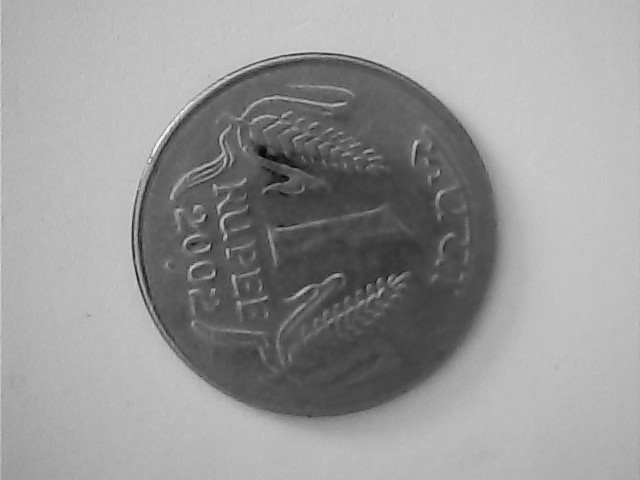

[[1.8068991e-18 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [0]:
img = cv2.imread("sample1.jpg",cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)
resize = cv2.resize(img, (384,384))
resized = resized.reshape(1,384,384,1)
print(model.predict(resized))